In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model


In [0]:
cifar10= tf.keras.datasets.cifar10

(x_train,y_train), (x_test,y_test)= cifar10.load_data()
x_train,x_test= x_train/255.0,x_test/255.0
y_train,y_test= y_train.flatten(),y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)


170500096/170498071 [==============================] - 18s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [0]:
k= len(set(y_train))
print("number of classes:",k)

number of classes: 10


In [0]:
# #build model using Functional API
i= Input(shape=x_train[0].shape)
# x= Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x= Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x= Conv2D(128, (3,3),strides=2, activation='relu')(x)
# x= Flatten()(x)
# x= Dropout(0.5)(x)
# x= Dense(1024,activation='relu')(x)
# x= Dense(k,activation='softmax')(x)

# model= Model(i,x)
x= Conv2D(32, (3,3), activation='relu',padding='same')(i)
x= BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
x= Conv2D(64, (3,3), activation='relu',padding='same')(x)
x= BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)
x= Conv2D(128, (3,3), activation='relu',padding='same')(x)
x= BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)

x= Flatten()(x)
x= Dropout(0.2)(x)
x= Dense(1024, activation='relu')(x)
x= Dropout(0.2)(x)
x= Dense(k,activation='softmax')(x)

model= Model(i,x)



In [0]:
#compile and fit

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)


Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3344 - accuracy: 0.5391 - val_loss: 1.2088 - val_accuracy: 0.5793
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9304 - accuracy: 0.6751 - val_loss: 1.0890 - val_accuracy: 0.6247
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7846 - accuracy: 0.7262 - val_loss: 0.8314 - val_accuracy: 0.7134
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6781 - accuracy: 0.7629 - val_loss: 1.0614 - val_accuracy: 0.6421
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5838 - accuracy: 0.7994 - val_loss: 0.8558 - val_accuracy: 0.7188
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4990 - accuracy: 0.8254 - val_loss: 0.9062 - val_accuracy: 0.6915
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4241 - accuracy: 0.8522 - val_loss: 0.7095 - val_accuracy:

In [0]:
#fit with data augmentation
batch_size= 32
data_generator= tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True)
train_generator= data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch= x_train.shape[0]
r= model.fit_generator(train_generator,validation_data=(x_test,y_test),
                       steps_per_epoch=steps_per_epoch,epochs=2)

Epoch 1/2
50000/50000 [==============================] - 1069s 21ms/step - loss: 0.3872 - accuracy: 0.8667 - val_loss: 0.5044 - val_accuracy: 0.8482
Epoch 2/2
50000/50000 [==============================] - 1060s 21ms/step - loss: 0.2532 - accuracy: 0.9135 - val_loss: 0.5603 - val_accuracy: 0.8463


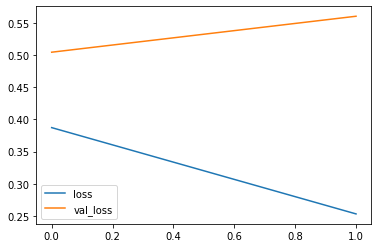

In [0]:
# plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

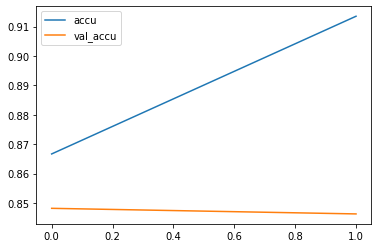

In [0]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accu')
plt.plot(r.history['val_accuracy'],label='val_accu')
plt.legend()

Confusion matrix, without normalization
[[790  11  56  14  28   2   6  12  36  45]
 [  9 880   3   4   2   3   7   0  14  78]
 [ 41   6 723  42  82  30  43  24   5   4]
 [ 15   6  81 543  74 141  65  55   8  12]
 [  7   2  53  38 800  18  35  42   3   2]
 [ 12   1  69 124  44 641  34  66   3   6]
 [  7   3  25  40  37  19 850  10   5   4]
 [  5   1  23  13  44  25   9 870   2   8]
 [ 34  25   9   9   6   3   8  10 874  22]
 [ 15  57   7  10   4   3   3  13  21 867]]


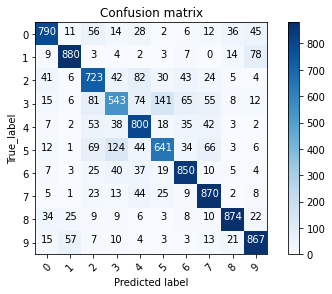

In [0]:
#plot Confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  #this function prints and plots the confusion matrix
  if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f'if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
#labels mapping
labels= '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

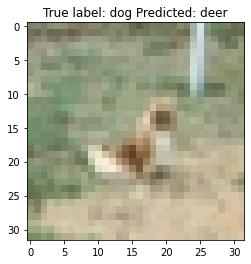

In [0]:
# Misclassified examples
misclassified_idx = np.where(p_test !=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));